<a href="https://colab.research.google.com/github/Alton1998/Scoliosis/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

In [2]:
X_train_reg = []
X_test_reg = []
X_val_reg = []
y_train_reg = []
y_test_reg = []
y_val_reg = []
with open("X_train_reg.pkl","rb") as f1, open("X_test_reg.pkl","rb") as f2, open("X_val_reg.pkl","rb") as f3, open("y_train_reg.pkl","rb") as f4, open("y_test_reg.pkl","rb") as f5, open("y_val_reg.pkl","rb") as f6:
  X_train_reg = pickle.load(f1)
  X_test_reg = pickle.load(f2)
  X_val_reg = pickle.load(f3)
  y_train_reg = pickle.load(f4)
  y_test_reg = pickle.load(f5)
  y_val_reg = pickle.load(f6)

In [3]:
X_train_reg = X_train_reg.values
X_test_reg = X_test_reg.values
X_val_reg = X_val_reg.values
y_train_reg = y_train_reg.values
y_test_reg = y_test_reg.values
y_val_reg = y_val_reg.values

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
# Scaling the data based on training
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)
X_val_reg = scaler.transform(X_val_reg)

In [7]:
from tensorflow.keras.models import Sequential

In [8]:

from tensorflow.keras.layers import Dense, Dropout

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)

In [11]:
model = Sequential()

In [12]:
model.add(Dense(28, activation="relu"))

In [13]:
model.add(Dropout(0.5))

In [14]:
model.add(Dense(14, activation="relu"))

In [15]:
model.add(Dropout(0.5))

In [16]:
model.add(Dense(7, activation="relu"))

In [17]:
model.add(Dropout(0.5))

In [18]:
model.add(Dense(1))

In [19]:
model.compile(loss="mse", optimizer="adam")

In [20]:
model.fit(
    x=X_train_reg,
    y=y_train_reg,
    epochs=600,
    validation_data=(X_val_reg, y_val_reg),
    batch_size=32,
    callbacks=[early_stop],
)

Epoch 1/600
4/4 [==============================] - 6s 215ms/step - loss: 52.8106 - val_loss: 70.5010
Epoch 2/600
4/4 [==============================] - 0s 35ms/step - loss: 49.0583 - val_loss: 70.5098
Epoch 3/600
4/4 [==============================] - 0s 53ms/step - loss: 52.2592 - val_loss: 70.5424
Epoch 4/600
4/4 [==============================] - 0s 56ms/step - loss: 50.3855 - val_loss: 70.5579
Epoch 5/600
4/4 [==============================] - 0s 55ms/step - loss: 53.5347 - val_loss: 70.5544
Epoch 6/600
4/4 [==============================] - 0s 31ms/step - loss: 51.2832 - val_loss: 70.5405
Epoch 6: early stopping


In [21]:
losses = pd.DataFrame(model.history.history)

<Axes: >

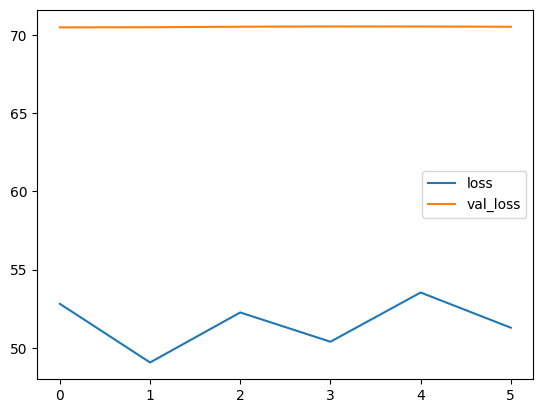

In [22]:

losses.plot()

In [23]:
y_test_pred = model.predict(X_test_reg)

2/2 [==============================] - 0s 12ms/step


In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
mean_absolute_error(y_test_reg,y_test_pred)

6.301070249446158

In [26]:
mean_squared_error(y_test_reg,y_test_pred)

67.5778607996506